In [127]:
from urllib.parse import urlencode
import pandas as pd
import seaborn as sb
import os
import regex as re
import spacy
import numpy as np
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [129]:
# store data in file
def write_list_to_file(data_list, file_path):
    with open(file_path, 'w', encoding='utf-8') as file:
        for item in data_list:
            file.write(item + '\n\n')


In [130]:
# Retreive data from file
def read_file_to_list(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data_list = []
        current_text = ""

        for line in file:
            if line.strip():
                current_text += line
            else:
                if current_text:
                    data_list.append(current_text.strip())
                    current_text = ""

        if current_text:
            data_list.append(current_text.strip())
    return data_list

In [131]:
Requirements_data_set=read_file_to_list("/content/drive/MyDrive/Requirements.txt")

for i in range(len(Requirements_data_set)):
    text=Requirements_data_set[i]
    text=re.sub(r"\s+"," ",text)
    Requirements_data_set[i]=text

Requirements_data_set[40][:500]

'About the job CFB Bots is a leading technology service provider in the fast-growing field of Intelligent Automation. We provide business process automation and digitalisation solutions powered by hyperautomation technologies including Artificial Intelligence (AI) and Robotic Process Automation (RPA).We partner with large enterprises in their Digital Transformation journey and help them and their employees thrive in the Future of Work. We help our customers unleash the full potential of their hum'

In [132]:
Resume_data_set=read_file_to_list("/content/drive/MyDrive/Resumes.txt")+read_file_to_list("/content/drive/MyDrive/university_resume.txt")+read_file_to_list("/content/drive/MyDrive/API_Resumes.txt")

In [133]:
Resume_data_set[0][:500]

'Resume HeadlineFront-End Developer | MERN | React Developer | Javascript Developer | Node.Js | MongoDB | HTML5 | CSS3 | Bootstrap | Express | API Integration | Software DeveloperSkill Set :              HMTL5, CSS3, JAVASCRIPT, MongoDB, Node.js, Bootstrap, Express.js, Api Integeration, Software Developer, Redux , ContextAPI , React.js,  Express-Validator          Prefered Job Type : :              Full-Time, Part-Time, Remote          Employement DetailsFrontend Developer Argus System Nov 2021 -'

In [134]:
# Remove Extra Spaces
for i in range(len(Resume_data_set)):
    text=Resume_data_set[i]

    text=text.replace("|","")
    text=re.sub(r"\s+"," ",text)


    Resume_data_set[i]=text

In [135]:
Resume_data_set[0][:500]

'Resume HeadlineFront-End Developer MERN React Developer Javascript Developer Node.Js MongoDB HTML5 CSS3 Bootstrap Express API Integration Software DeveloperSkill Set : HMTL5, CSS3, JAVASCRIPT, MongoDB, Node.js, Bootstrap, Express.js, Api Integeration, Software Developer, Redux , ContextAPI , React.js, Express-Validator Prefered Job Type : : Full-Time, Part-Time, Remote Employement DetailsFrontend Developer Argus System Nov 2021 - Present • Collaborated with cross-functional teams to design, deve'

In [136]:
# Apply Regular Expressions to remove unwanted data

patterns = ['\d{11}','\d{4}-\d{7}', '[a-z0-9]*@gmail.com','linkedin.com[\/ a-z-0-9A-Z]*','Resume','resume','Resume Headline','github.com[\/ a-z-0-9:.A-Z]*','Pakistan','Lahore','india','India','INDIA']
combined_pattern = '|'.join(patterns)
pattern=re.compile(combined_pattern)

for i in range(len(Resume_data_set)):
    Resume_data_set[i] = pattern.sub('',Resume_data_set[i])

In [137]:
Model=spacy.load("en_core_web_sm")

In [138]:
def Processing(List):
    for i in range(len(List)):
        doc=Model(List[i])
        concat_tokens=list()
        for token in doc:
            if(token.is_alpha and not(token.is_punct) and not(token.is_stop)):
                concat_tokens.append(token.lemma_)
        text=' '.join(concat_tokens)
        text=text.lower()
        List[i]=text
    return List

In [139]:
Resume_data_set[0]

' HeadlineFront-End Developer MERN React Developer Javascript Developer Node.Js MongoDB HTML5 CSS3 Bootstrap Express API Integration Software DeveloperSkill Set : HMTL5, CSS3, JAVASCRIPT, MongoDB, Node.js, Bootstrap, Express.js, Api Integeration, Software Developer, Redux , ContextAPI , React.js, Express-Validator Prefered Job Type : : Full-Time, Part-Time, Remote Employement DetailsFrontend Developer Argus System Nov 2021 - Present • Collaborated with cross-functional teams to design, develop, and deploy responsive web applications using HTML, CSS, and JavaScript.• Utilized ReactJS to create interactive user interfaces, resulting in improved user experience and increased user engagement.• Implemented modern design principles and coding standards to ensure consistent and visually appealing websites.• Worked closely with UI/UX designers to translate wireframes and mockups into functional web components.• Collaborated with backend developers to integrate front-end interfaces with server-

In [140]:
Resume_data_set=Processing(Resume_data_set)

In [141]:
Resume_data_set[0]

'headlinefront end developer mern react developer javascript developer node js mongodb bootstrap express api integration software developerskill set javascript mongodb bootstrap api integeration software developer redux contextapi express validator prefer job type time time remote employement detailsfrontend developer argus system nov present collaborate cross functional team design develop deploy responsive web application html css utilize reactjs create interactive user interface result improved user experience increase user implement modern design principle code standard ensure consistent visually appeal work closely ui ux designer translate wireframe mockup functional web collaborate backend developer integrate end interface server collaborate cross functional team design develop deploy responsive web application html css javascript utilize reactjs create interactive user interface result improved user experience increase user engagement implement modern design principle code stand

In [142]:
Requirements_data_set[40]

"About the job CFB Bots is a leading technology service provider in the fast-growing field of Intelligent Automation. We provide business process automation and digitalisation solutions powered by hyperautomation technologies including Artificial Intelligence (AI) and Robotic Process Automation (RPA).We partner with large enterprises in their Digital Transformation journey and help them and their employees thrive in the Future of Work. We help our customers unleash the full potential of their human workforce.Our mission is to co-create the Digital Workforce of the Future, and our vision is to make work enjoyable.The RoleWe are looking for like-minded enthusiast to join us as Power Platform Developer. You will play a key role in helping customers to unleash the full potential of human workforce and drive productivity through the building and implementation of innovative solutions.In return, you will achieve a high sense of job satisfaction and gain appreciation/recognition as you implem

In [143]:
Requirements_data_set=Processing(Requirements_data_set)

In [144]:
Requirements_data_set[40]

'job cfb bots lead technology service provider fast grow field intelligent automation provide business process automation digitalisation solution power hyperautomation technology include artificial intelligence ai robotic process automation partner large enterprise digital transformation journey help employee thrive future work help customer unleash potential human workforce mission co create digital workforce future vision work enjoyable rolewe look like minded enthusiast join power platform developer play key role help customer unleash potential human workforce drive productivity building implementation innovative solution return achieve high sense job satisfaction gain appreciation recognition implement solution help liberate user tedium chance meet people different function organization industry gain exposure business unique challenge finally enjoy strong personal growth boost career constantly develop learn new solution responsibility include design develop application microsoft p

In [145]:
print(len(Resume_data_set))
print(len(Requirements_data_set))

515
139


In [146]:
# write_list_to_file(Resume_data_set, "preprocess_resume.txt")
# write_list_to_file(Requirements_data_set, "preprocess_requirement.txt")

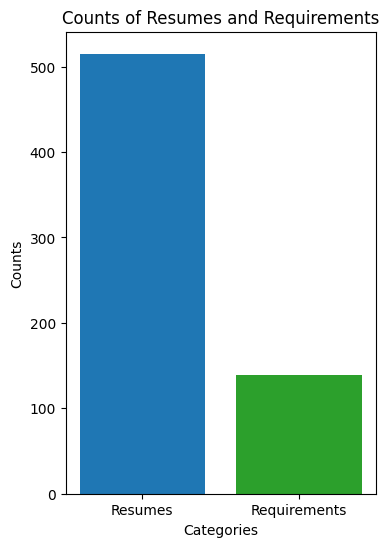

In [147]:
import matplotlib.pyplot as plt

# Data
categories = [0, 1]
counts = [len(Resume_data_set), len(Requirements_data_set)]

# Brighter colors
colors = ['#1f77b4', '#2ca02c']  # Blue and green

# Plot
plt.figure(figsize=(4, 6))
plt.bar(categories, counts, color=colors)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Counts of Resumes and Requirements')
plt.xticks(categories, ['Resumes', 'Requirements'])
plt.show()


# BERT Model

In [1]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
import numpy as np
# Load pre-trained BERT model and tokenizer
model_name = 'google-bert/bert-base-uncased'  # You can choose a different pre-trained model
tokenizer = BertTokenizer.from_pretrained(model_name)
model = TFBertModel.from_pretrained(model_name)

def Embeddings_generator(data_sample):
    embeddings=list()
    for sample in data_sample:
        # Tokenize input text
        input_ids = tokenizer.encode(sample, add_special_tokens=True, return_tensors="tf", max_length=512, truncation=True)

        # Feed input tokens to BERT model
        outputs = model(input_ids)

        # Get hidden states from the output
        hidden_states = outputs.last_hidden_state

        # Extract embeddings from the final layer
        embedding = tf.reduce_mean(hidden_states, axis=1)

        embeddings.append(embedding[0])
    return embeddings

In [161]:
resume_embeddings=Embeddings_generator(Resume_data_set)
Requirements_embeddings=Embeddings_generator(Requirements_data_set)

In [22]:
type(resume_embeddings[0])

tensorflow.python.framework.ops.EagerTensor

In [162]:
from sklearn.metrics.pairwise import cosine_similarity

# Convert resume_embeddings and Requirements_embeddings to numpy arrays
resume_embeddings_np = np.array(resume_embeddings)
Requirements_embeddings_np = np.array(Requirements_embeddings)

similarity = []

# Calculate cosine similarity
for i, resume_emb in enumerate(resume_embeddings_np):
    for j, requirement_emb in enumerate(Requirements_embeddings_np):
        if len(resume_emb.shape) == 1:
            resume_emb = resume_emb.reshape(1, -1)
        if len(requirement_emb.shape) == 1:
            requirement_emb = requirement_emb.reshape(1, -1)

        similarity_score = cosine_similarity(resume_emb, requirement_emb)[0][0]
        similarity.append((i, j, similarity_score))


In [195]:
#Make data Frame
Resume_list=list()
Requirement_list=list()
label=list()

label_index=0
for sample in similarity:
    if(sample[2]>0.88): #0.88 is threshold 
        Resume_list.append(resume_embeddings[sample[0]])
        Requirement_list.append(Requirements_embeddings[sample[1]])
        label.append(1)
    else:
        Resume_list.append(resume_embeddings[sample[0]])
        Requirement_list.append(Requirements_embeddings[sample[1]])
        label.append(0)
    label_index+=1

In [197]:
type(Resume_list[0])

tensorflow.python.framework.ops.EagerTensor

In [198]:
Final_data_set=pd.DataFrame({"Resume":Resume_list,"Requirement":Requirement_list,"Label":label})

In [199]:
Final_data_set.head()

,Resume,Requirement,Label
0,"(tf.Tensor(-0.024618303, shape=(), dtype=float...","(tf.Tensor(-0.11915118, shape=(), dtype=float3...",0
1,"(tf.Tensor(-0.024618303, shape=(), dtype=float...","(tf.Tensor(-0.08140805, shape=(), dtype=float3...",0
2,"(tf.Tensor(-0.024618303, shape=(), dtype=float...","(tf.Tensor(-0.10824052, shape=(), dtype=float3...",1
3,"(tf.Tensor(-0.024618303, shape=(), dtype=float...","(tf.Tensor(-0.04756498, shape=(), dtype=float3...",0
4,"(tf.Tensor(-0.024618303, shape=(), dtype=float...","(tf.Tensor(-0.2157805, shape=(), dtype=float32...",1


<ipython-input-200-7257d042de81>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x='Label', data=Final_data_set, palette=custom_palette)


<Axes: xlabel='Label', ylabel='count'>

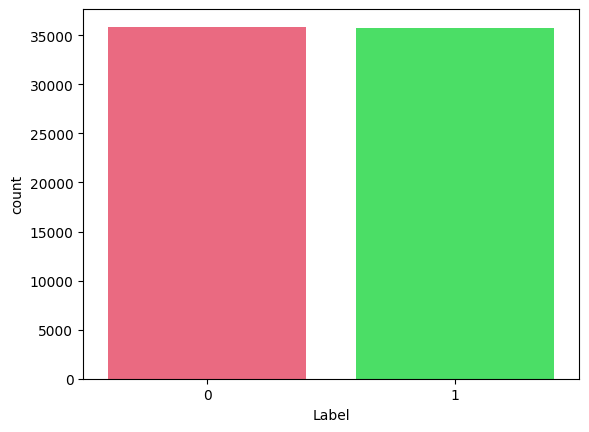

In [200]:
# Define custom colors
custom_palette = ["#FF5573", "#33F657"]

sb.countplot(x='Label', data=Final_data_set, palette=custom_palette)

In [201]:
sample=Final_data_set['Label'].value_counts()
elements=Final_data_set['Label'].unique()

print(f"label {elements[0]} data: {sample[0]/len(Final_data_set['Label'])*100}%")
print(f"label {elements[1]} data: {sample[1]/len(Final_data_set['Label'])*100}%")

label 0 data: 50.11664454843891%
label 1 data: 49.88335545156108%


In [196]:
Resume_list=np.array(Resume_list)
Requirement_list=np.array(Requirement_list)
labels=np.array(label)
Features=np.concatenate((Resume_list,Requirement_list),axis=1)

# Model Creation

In [35]:
import tensorflow as tf
from tensorflow.keras import layers,Sequential
from tensorflow import keras
from keras.activations import relu,sigmoid
from keras.losses import BinaryCrossentropy
from keras.optimizers import Adam
from keras.metrics import Accuracy

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(Features,labels,test_size=0.3)

In [81]:
input_shape=(Features.shape[1],)
model=Sequential([
    layers.Dense(units=400,activation=relu, input_shape=input_shape),
    layers.Dense(units=300,activation=relu),
    layers.Dense(units=200,activation=relu),
    layers.Dense(units=100,activation=relu),
    layers.Dense(units=50,activation=relu),
    layers.Dense(units=25,activation=relu),
    layers.Dense(units=10,activation=relu),
    layers.Dense(units=1,activation=sigmoid)
])

In [82]:
model.compile(loss=BinaryCrossentropy(), optimizer=Adam(), metrics=Accuracy())

# Model Training

In [83]:
model.fit(X_train,Y_train,epochs=100)

Epoch 1/100
1566/1566 [==============================] - 25s 15ms/step - loss: 0.2693 - accuracy: 0.0000e+00
Epoch 2/100
1566/1566 [==============================] - 25s 16ms/step - loss: 0.1772 - accuracy: 1.9956e-05
Epoch 3/100
1566/1566 [==============================] - 23s 15ms/step - loss: 0.1525 - accuracy: 3.5922e-04
Epoch 4/100
1566/1566 [==============================] - 23s 15ms/step - loss: 0.1395 - accuracy: 7.9826e-04
Epoch 5/100
1566/1566 [==============================] - 23s 14ms/step - loss: 0.1306 - accuracy: 0.0014
Epoch 6/100
1566/1566 [==============================] - 22s 14ms/step - loss: 0.1212 - accuracy: 0.0016
Epoch 7/100
1566/1566 [==============================] - 24s 15ms/step - loss: 0.1147 - accuracy: 0.0022
Epoch 8/100
1566/1566 [==============================] - 24s 15ms/step - loss: 0.1095 - accuracy: 0.0054
Epoch 9/100
1566/1566 [==============================] - 22s 14ms/step - loss: 0.1040 - accuracy: 0.0032
Epoch 10/100
1566/1566 [===============

# Model Testing

In [84]:
Y_predicted=model.predict(X_test)
for a in range(len(Y_predicted)):
    if Y_predicted[a]>0.5:
        Y_predicted[a]=1
    else:
        Y_predicted[a]=0

672/672 [==============================] - 3s 5ms/step


In [123]:
X_test.shape

(21476, 1536)

In [85]:
from sklearn.metrics import recall_score,precision_score,accuracy_score,f1_score
print(f"Accuracy Score : {accuracy_score(Y_test,Y_predicted)*100}")
print(f"Precision Score :{precision_score(Y_test,Y_predicted)*100} ")
print(f"Recall Score :{recall_score(Y_test,Y_predicted)*100} ")

Accuracy Score : 96.6008567703483
Precision Score :97.65129273605456 
Recall Score :95.53414249976836 


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


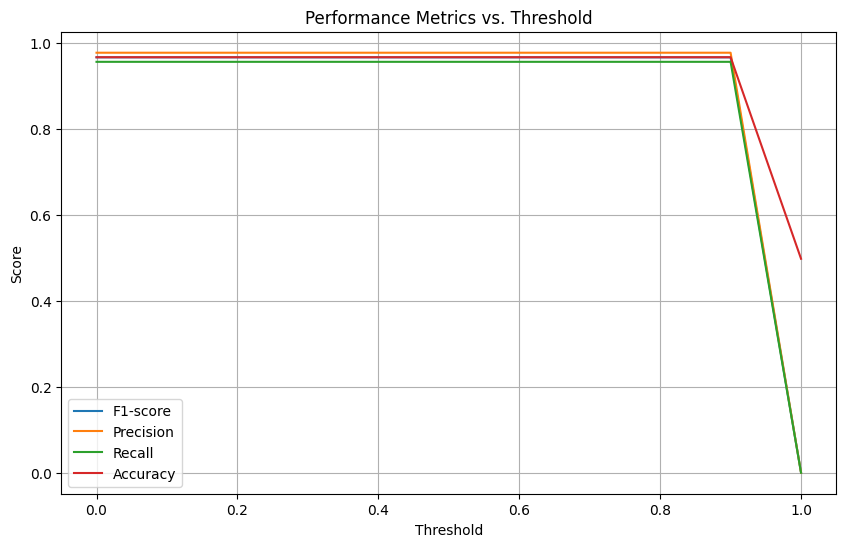

In [91]:
thresholds = np.arange(0, 1.1, 0.1)

# Initialize lists to store scores
f1_scores = []
precision_scores = []
recall_scores = []
accuracy_scores = []

# Compute scores for each threshold
for threshold in thresholds:
    Y_predicted_thresholded = (Y_predicted > threshold).astype(int)
    f1_scores.append(f1_score(Y_test, Y_predicted_thresholded))
    precision_scores.append(precision_score(Y_test, Y_predicted_thresholded))
    recall_scores.append(recall_score(Y_test, Y_predicted_thresholded))
    accuracy_scores.append(accuracy_score(Y_test, Y_predicted_thresholded))

# Plot the scores
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label='F1-score')
plt.plot(thresholds, precision_scores, label='Precision')
plt.plot(thresholds, recall_scores, label='Recall')
plt.plot(thresholds, accuracy_scores, label='Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Performance Metrics vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()


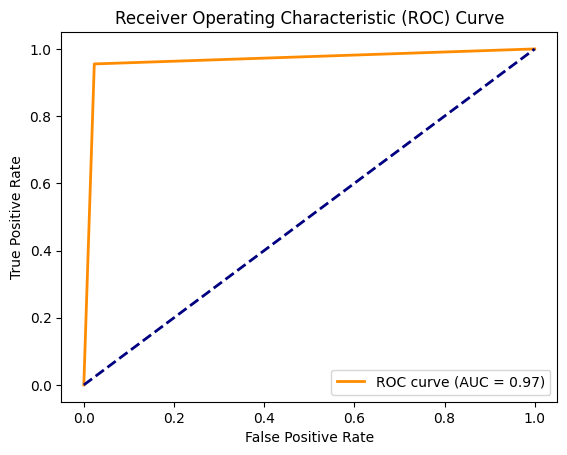

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix, roc_auc_score
from sklearn.calibration import calibration_curve
import seaborn as sns

# Sample data (replace with your actual data)
y_true = Y_test
y_scores = Y_predicted

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_score(y_true, y_scores))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


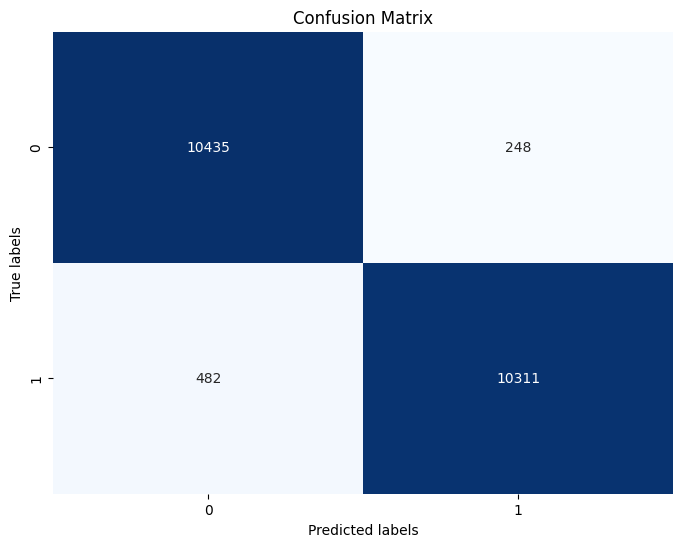

In [87]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(Y_test, Y_predicted)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [88]:
import pickle
with open("BERT_Trained_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [4]:
import pickle
with open("BERT_Trained_model.pkl", "rb") as f:
    model = pickle.load(f)